In [1]:
from sklearn.datasets import fetch_california_housing 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [31]:
from matplotlib import pyplot as plt
from sklearn import tree

In [3]:
housing = fetch_california_housing(as_frame=True)
df = housing.data
df = df.reset_index()

In [4]:
target = housing.target
target = target.reset_index()

In [5]:
dataset = pd.merge(df, target, on ='index', how='left')

In [6]:
dataset


,index,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
dataset.describe()

,index,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,10319.500000,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,5958.399114,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.000000,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,5159.750000,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,10319.500000,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,15479.250000,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,20639.000000,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
dataset.isnull().sum().sum()

0

In [11]:
dataset_filtered = dataset[(dataset['AveRooms']<7) &(dataset['AveBedrms']<2)& (dataset['AveOccup'] < 4) & (dataset['AveBedrms']<10)&(dataset['MedHouseVal']<5)]

In [12]:
dataset_filtered

,index,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
...,...,...,...,...,...,...,...,...,...,...
20635,20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [20]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution = 'normal',n_quantiles=10 )
dataset_filtered['Population_quan'] = qt.fit_transform(dataset_filtered[['Population']])


C:\Temp/ipykernel_5860/3240264380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered['Population_quan'] = qt.fit_transform(dataset_filtered[['Population']])


In [21]:
dataset_filtered

,index,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Population_quan
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,-1.526788
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1.221659
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,-1.224849
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,-1.211664
5,5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697,-1.395087
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,-0.567154
20636,20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,-1.474563
20637,20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,-0.257255
20638,20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,-0.795692


In [23]:
from sklearn.model_selection import train_test_split
X = dataset_filtered[['MedInc','HouseAge','AveRooms','AveBedrms','Population_quan','AveOccup','Latitude','Longitude']]
y = dataset_filtered[['MedHouseVal']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()

In [25]:
model_lin.fit(X_train,y_train)

LinearRegression()

In [26]:
model_lin.score(X_test,y_test)

0.6088773238977359

In [39]:
from sklearn.tree import DecisionTreeRegressor
model_tree_init = DecisionTreeRegressor()
model_tree_init.fit(X_train,y_train)

DecisionTreeRegressor()

In [40]:
model_tree_init.score(X_test,y_test)

0.5190285701550659

In [52]:
model_tree = DecisionTreeRegressor(max_depth=10, max_features = 'log2',random_state=42)
model_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, max_features='log2', random_state=42)

In [53]:
model_tree.score(X_test,y_test)

0.6386907124463179

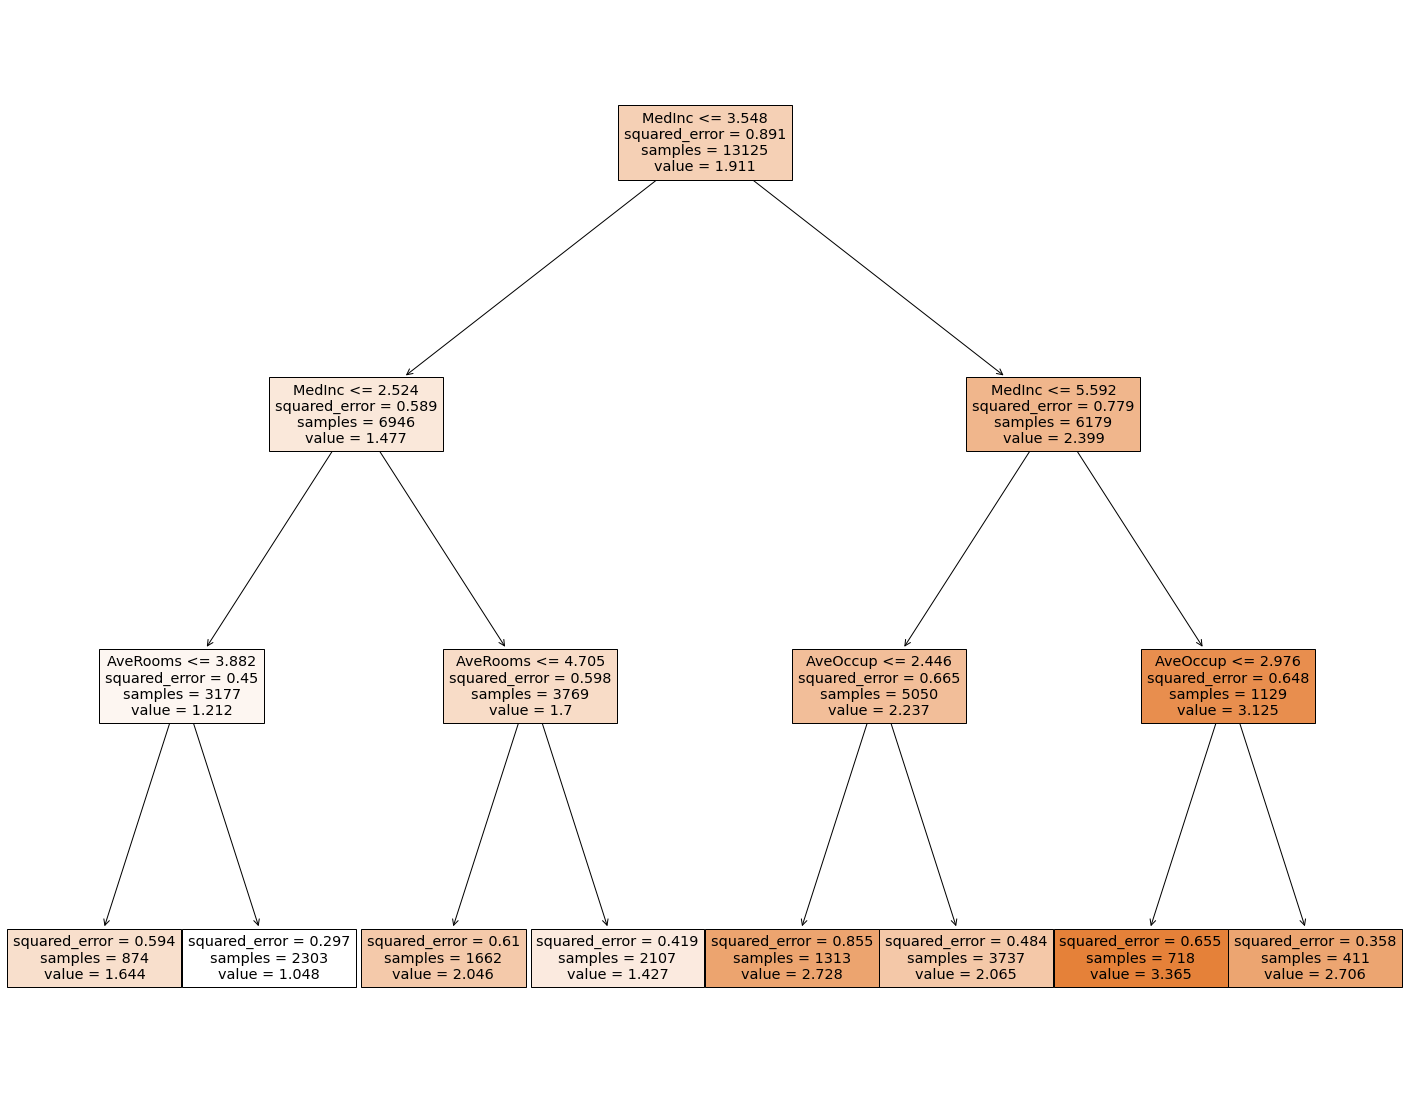

In [37]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_tree, feature_names=fetch_california_housing().feature_names, filled=True)

### Выводы:
* Random forest не может экстраполировать данные, работает только в диапазоне увиденного в обучении, тогда как линейная регрессия может.
* Random forest может работать с пропущенными значениями, а линейная нет и требует нормального распределения.
* Random forest может работать с данными, в которых зависимость нелинейная. А также может работать с ненормированными данными.
* Линейная регрессия работает достаточно быстро 
